# Lotto Number Predictions

This notebook performs a download of the most recent winning numbers from the Lotto649 (a lottery managed by the **British Columbia Lotto Corporation** in BC, Canada), and performs basic number analysis on them in order to describe the most winningest numbers in history.



## Imports

In [2]:
import sys
import pandas as pd
import datetime as dt
import urllib.request
import zipfile

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

## Resources

In [4]:
# Main Getter Function

# Download 
def dl_file(url, data_path, file_name):
    print("### Downloading " + url + " and saving as " + data_path + file_name)
    urllib.request.urlretrieve(url, data_path + file_name)
    
    
# Unzip
def unzip(data_path, file_name):
  print("### Unzipping " + file_name + " at " + data_path)

  zip_ref = zipfile.ZipFile(data_path + file_name, 'r')
  zip_ref.extractall(data_path)
  zip_ref.close()

# Variables 
# TODO - make abstract to handle other sets
#url = "http://www.bclc.com/documents/DownloadableNumbers/CSV/649.zip"
url = "http://www.bclc.com/DownloadableNumbers/CSV/649.zip"
data_path = "data/"
file_name = "649"

# download zip file and save
dl_file(url, data_path, file_name)

# unzip to csv
unzip(data_path, file_name)


### Downloading http://www.bclc.com/DownloadableNumbers/CSV/649.zip and saving as data/649
### Unzipping 649 at data/


## Conversion

In [5]:
base_reader = pd.read_csv(data_path + file_name + ".csv")
base_reader.set_index("DRAW NUMBER", inplace=True)
base_reader.tail()

,PRODUCT,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
DRAW NUMBER,,,,,,,,,,
3824,649,0,2020-09-12,5,13,19,37,42,45,40
3825,649,0,2020-09-16,6,12,23,29,44,46,39
3826,649,0,2020-09-19,5,15,31,35,42,46,17
3827,649,0,2020-09-23,11,17,28,29,36,39,15
3828,649,0,2020-09-26,8,27,29,33,40,49,2


In [6]:
columns = list(base_reader.loc[:,'NUMBER DRAWN 1':'NUMBER DRAWN 6'])
draws = base_reader[columns]

draws.tail()

,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6
DRAW NUMBER,,,,,,
3824,5,13,19,37,42,45
3825,6,12,23,29,44,46
3826,5,15,31,35,42,46
3827,11,17,28,29,36,39
3828,8,27,29,33,40,49


## Analysis

### Ball #1

In [7]:
# set
b1 = draws["NUMBER DRAWN 1"]

# describe
b1.describe()

count    3828.000000
mean        7.302508
std         5.812947
min         1.000000
25%         3.000000
50%         6.000000
75%        10.000000
max        38.000000
Name: NUMBER DRAWN 1, dtype: float64

In [8]:
# unique
b1vc = b1.value_counts()
b1vc.columns = ["value"]
b1vc

1     445
2     415
3     368
4     363
5     272
6     249
7     231
9     198
8     193
10    159
11    150
12    126
13    107
14     75
16     74
15     72
18     54
17     53
20     44
19     42
21     31
23     29
22     19
24     13
26     11
27      9
25      8
28      5
30      4
29      4
31      2
33      1
32      1
38      1
Name: NUMBER DRAWN 1, dtype: int64

<AxesSubplot:>

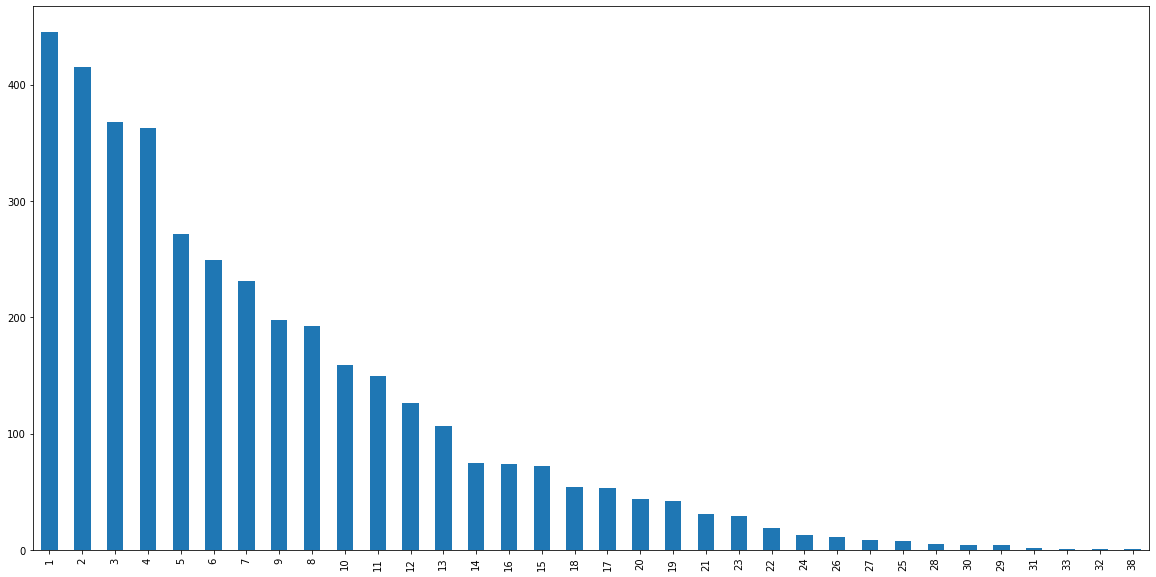

In [9]:
b1vc.plot(kind='bar')

In [10]:
b1vc_vals = b1vc.index
b1vc_vals

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  9,  8, 10, 11, 12, 13, 14, 16, 15, 18,
            17, 20, 19, 21, 23, 22, 24, 26, 27, 25, 28, 30, 29, 31, 33, 32,
            38],
           dtype='int64')

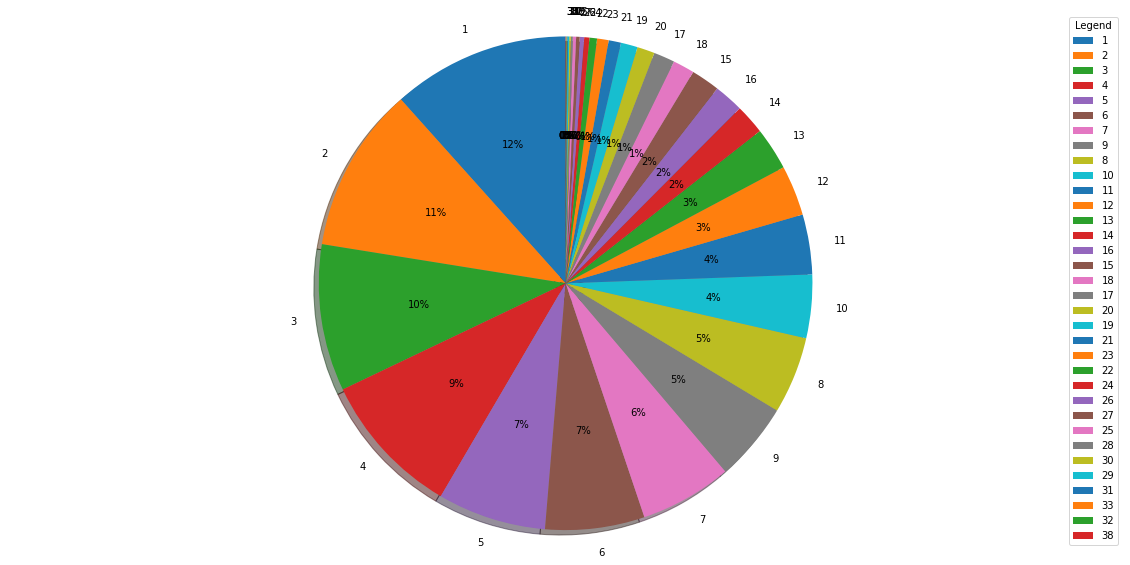

In [11]:
fig1, ax1 = plt.subplots()

explode = (0.05, 0)

ax1.pie(b1vc, autopct='%1.0f%%', labels=b1vc_vals, shadow=True, startangle=90)
ax1.axis('equal')
plt.legend(title="Legend")
plt.show()

#### Validaton

_It seems very odd to me that the most frequent numbers are the lowest numbers, so let's do a little bit of analysis in order to validate that i'm not doing something wrong..._

In [12]:
# Filter Columns to Date and Ball #1
draw_dates_1_list = list(base_reader.loc[:,'DRAW DATE':'NUMBER DRAWN 1'])
draw_dates_1 = base_reader[draw_dates_1_list]
draw_dates_1.tail()

,DRAW DATE,NUMBER DRAWN 1
DRAW NUMBER,,
3824,2020-09-12,5
3825,2020-09-16,6
3826,2020-09-19,5
3827,2020-09-23,11
3828,2020-09-26,8


In [13]:
# Filter to 2020 Draws
draw_dates_1_2020 = draw_dates_1[(draw_dates_1['DRAW DATE'] > '2020-0-0')]
draw_dates_1_2020.head()

,DRAW DATE,NUMBER DRAWN 1
DRAW NUMBER,,
3751,2020-01-01,11
3752,2020-01-04,23
3753,2020-01-08,2
3754,2020-01-11,2
3755,2020-01-15,1


In [14]:
# Filter to display all #1 draws during 2020
draw_dates_ball_one_number_one = draw_dates_1_2020[(draw_dates_1_2020['NUMBER DRAWN 1'] == 1)]
draw_dates_ball_one_number_one

,DRAW DATE,NUMBER DRAWN 1
DRAW NUMBER,,
3755,2020-01-15,1
3761,2020-02-05,1
3772,2020-03-14,1
3781,2020-04-15,1
3782,2020-04-18,1
3790,2020-05-16,1
3802,2020-06-27,1
3803,2020-07-01,1
3811,2020-07-29,1


In [48]:
# Let's see what percent of the draws in 2020 are Ball #1

In [15]:
percent_ball_one = len(draw_dates_1_2020.index) / len(draw_dates_ball_one_number_one.index)
percent_ball_one

6.5

In [39]:
# This seems to match with our results from Cell 11... let's verify

In [53]:
# ball_one_number_one_list = list(base_reader.loc[:,'NUMBER DRAWN 1'])
# ball_one_number_one = base_reader[ball_one_number_one_list]
# ball_one_number_one

In [17]:

ball_one_number_one_draws = draws[(draws['NUMBER DRAWN 1'] == 1)]
ball_one_number_one_draws


percent_ball_one = len(draw_dates_1_2020.index) / len(ball_one_number_one_draws.index)
percent_ball_one

0.1752808988764045

### Ball #2

In [18]:
# set
b2 = draws["NUMBER DRAWN 2"]

# describe
b2.describe()

count    3828.00000
mean       14.52116
std         7.54752
min         2.00000
25%         9.00000
50%        14.00000
75%        20.00000
max        43.00000
Name: NUMBER DRAWN 2, dtype: float64

In [19]:
# unique
b2vc = b2.value_counts()
b2vc.columns = ["value"]
b2vc

10    201
12    200
8     199
13    188
9     185
7     184
14    181
15    181
17    172
11    166
16    165
6     160
5     158
19    139
20    137
18    130
21    128
4     106
3     100
22     99
23     87
24     87
25     66
26     66
27     52
29     49
2      48
28     46
30     40
32     28
31     25
33     13
34     12
35     11
36      4
37      4
40      3
39      3
38      2
43      1
41      1
42      1
Name: NUMBER DRAWN 2, dtype: int64

<AxesSubplot:>

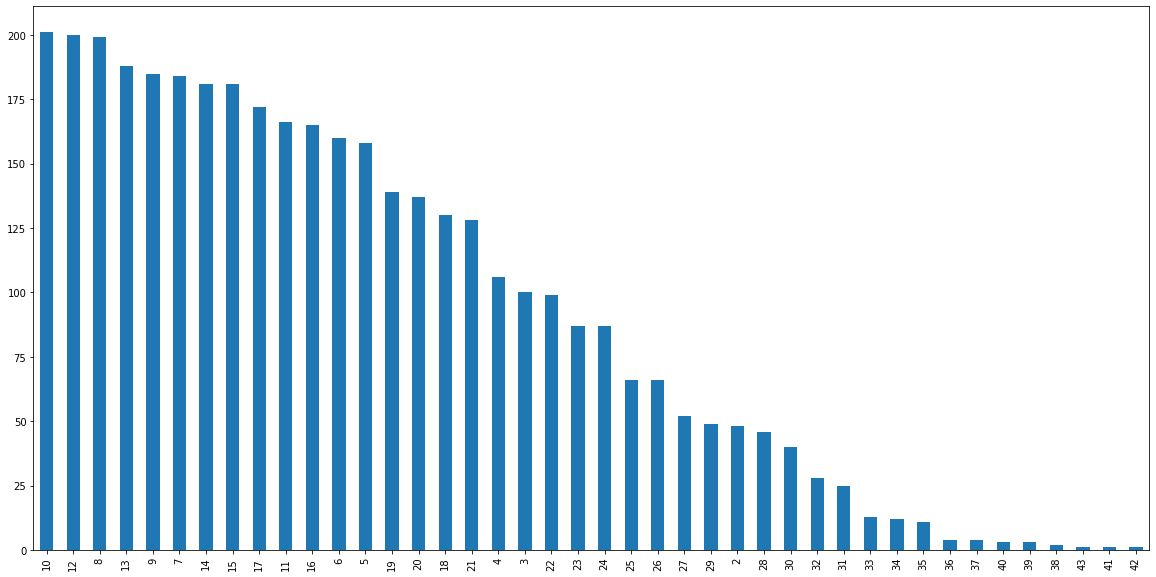

In [20]:
b2vc.plot(kind='bar')

In [21]:
b2vc_vals = b2vc.index
b2vc_vals

Int64Index([10, 12,  8, 13,  9,  7, 14, 15, 17, 11, 16,  6,  5, 19, 20, 18, 21,
             4,  3, 22, 23, 24, 25, 26, 27, 29,  2, 28, 30, 32, 31, 33, 34, 35,
            36, 37, 40, 39, 38, 43, 41, 42],
           dtype='int64')

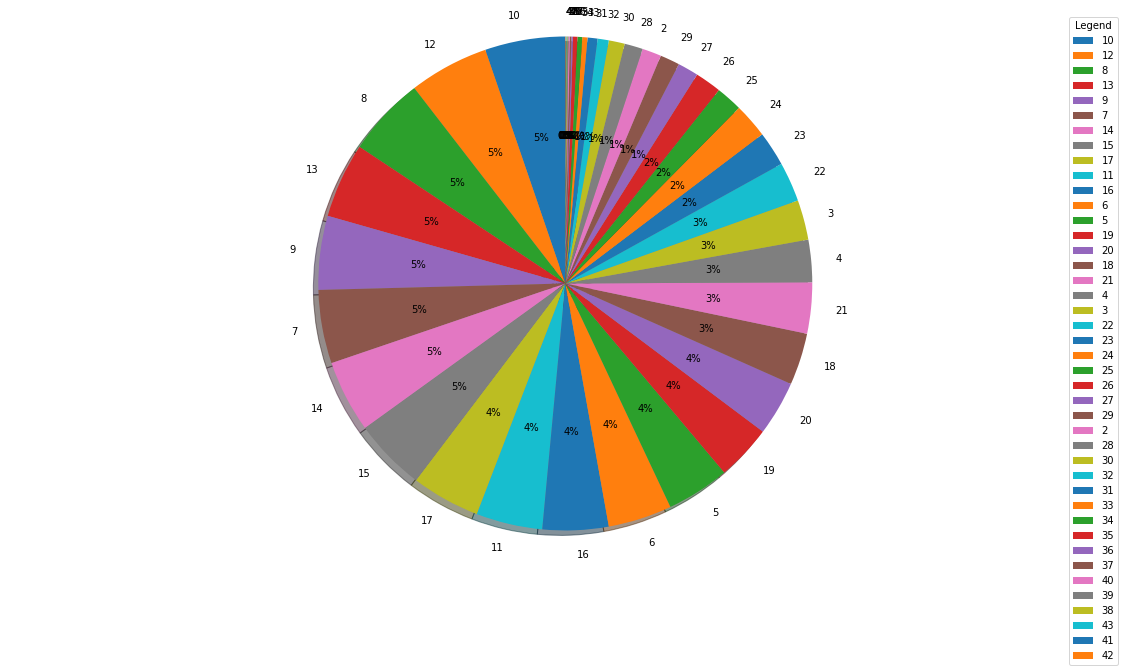

In [22]:
fig1, ax1 = plt.subplots()

explode = (0.05, 0)

ax1.pie(b2vc, autopct='%1.0f%%', labels=b2vc_vals, shadow=True, startangle=90)
ax1.axis('equal')
plt.legend(title="Legend")
plt.show()

### Ball #3

In [23]:
# set
b3 = draws["NUMBER DRAWN 3"]

# describe
b3.describe()

count    3828.000000
mean       21.842999
std         8.188858
min         3.000000
25%        16.000000
50%        22.000000
75%        28.000000
max        45.000000
Name: NUMBER DRAWN 3, dtype: float64

In [24]:
# unique
b3vc = b3.value_counts()
b3vc.columns = ["value"]
b3vc

22    185
23    176
21    174
19    172
25    166
20    165
24    164
17    160
18    160
16    146
15    141
26    137
27    134
29    130
28    120
13    115
14    113
12    106
31    104
30    103
11     97
32     96
33     84
10     82
34     77
9      72
36     61
8      58
7      55
35     55
6      42
37     40
38     32
40     26
39     19
5      18
41     18
4       8
42      6
43      5
3       3
44      2
45      1
Name: NUMBER DRAWN 3, dtype: int64

<AxesSubplot:>

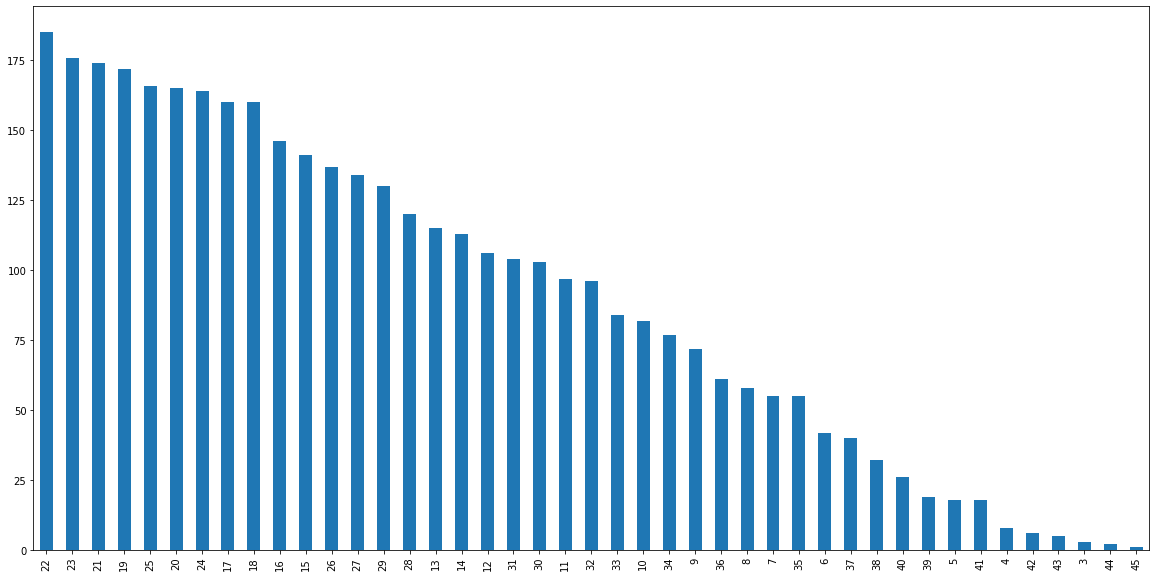

In [25]:
b3vc.plot(kind='bar')

In [26]:
b3vc_vals = b3vc.index
b3vc_vals

Int64Index([22, 23, 21, 19, 25, 20, 24, 17, 18, 16, 15, 26, 27, 29, 28, 13, 14,
            12, 31, 30, 11, 32, 33, 10, 34,  9, 36,  8,  7, 35,  6, 37, 38, 40,
            39,  5, 41,  4, 42, 43,  3, 44, 45],
           dtype='int64')

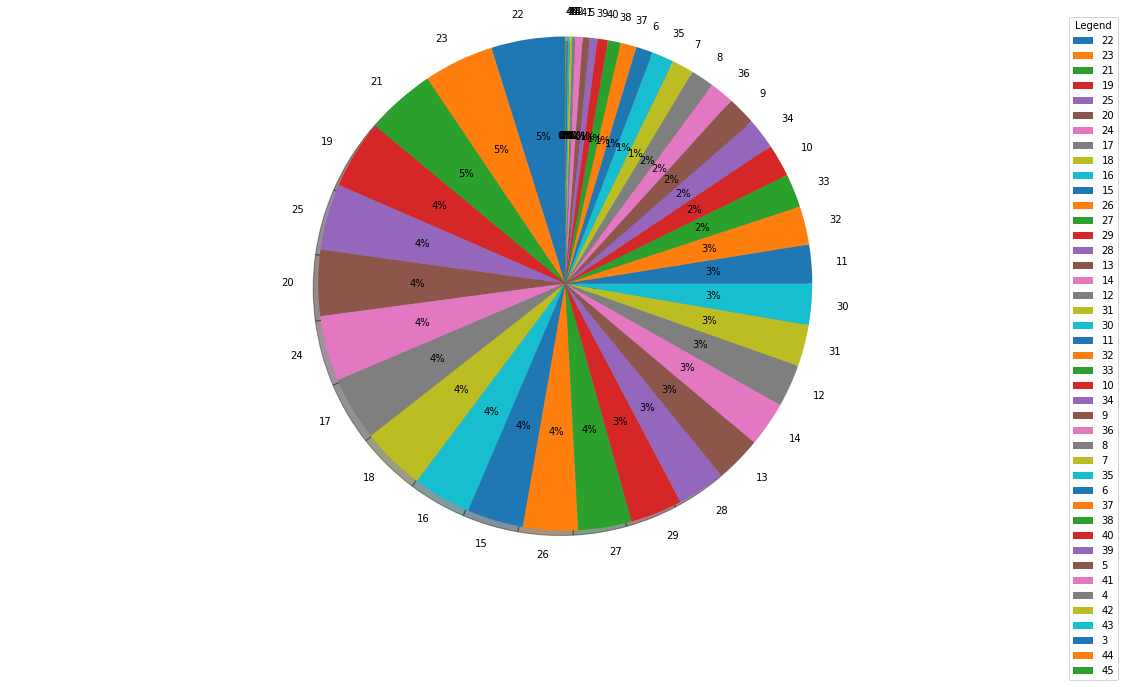

In [27]:
fig1, ax1 = plt.subplots()

explode = (0.05, 0)

ax1.pie(b3vc, autopct='%1.0f%%', labels=b3vc_vals, shadow=True, startangle=90)
ax1.axis('equal')
plt.legend(title="Legend")
plt.show()

### Ball #4

In [28]:
# set
b4 = draws["NUMBER DRAWN 4"]

# describe
b4.describe()

count    3828.000000
mean       28.971003
std         8.097876
min         4.000000
25%        23.000000
50%        30.000000
75%        35.000000
max        47.000000
Name: NUMBER DRAWN 4, dtype: float64

In [29]:
# unique
b4vc = b4.value_counts()
b4vc.columns = ["value"]
b4vc

31    200
34    181
27    178
33    172
30    171
32    167
26    161
28    159
29    157
36    151
23    143
25    141
35    139
37    130
24    126
38    125
22    117
20    115
39    111
40    108
21    101
19     86
18     83
41     81
17     60
42     59
16     59
43     48
15     47
14     40
44     31
11     29
13     27
12     27
45     25
10     21
9      15
46     14
8      11
47      5
7       4
4       2
6       1
Name: NUMBER DRAWN 4, dtype: int64

<AxesSubplot:>

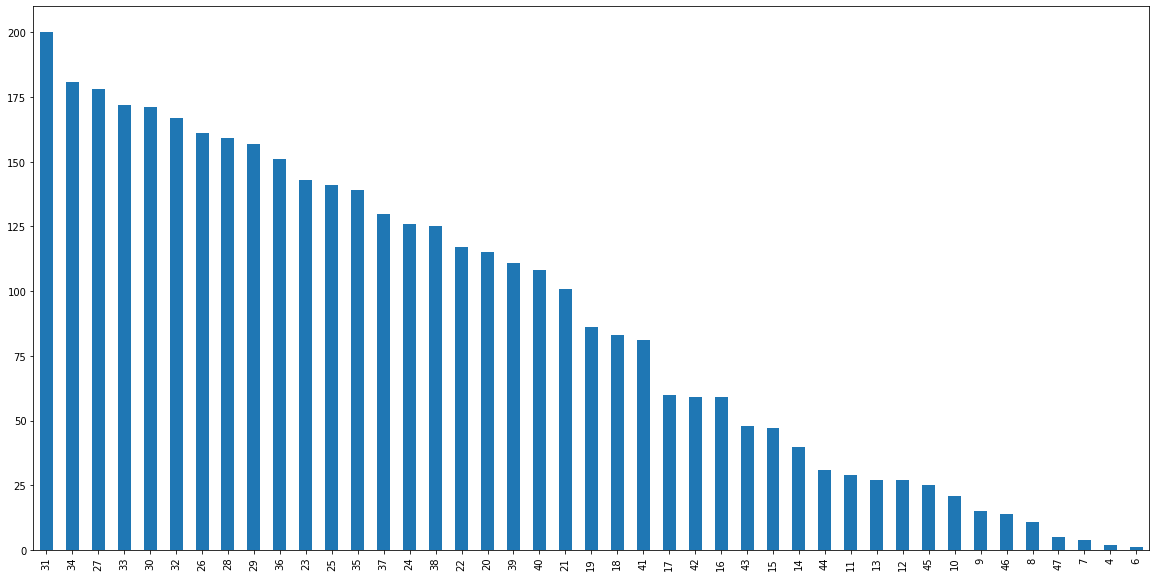

In [30]:
b4vc.plot(kind='bar')

In [31]:
b4vc_vals = b4vc.index
b4vc_vals

Int64Index([31, 34, 27, 33, 30, 32, 26, 28, 29, 36, 23, 25, 35, 37, 24, 38, 22,
            20, 39, 40, 21, 19, 18, 41, 17, 42, 16, 43, 15, 14, 44, 11, 13, 12,
            45, 10,  9, 46,  8, 47,  7,  4,  6],
           dtype='int64')

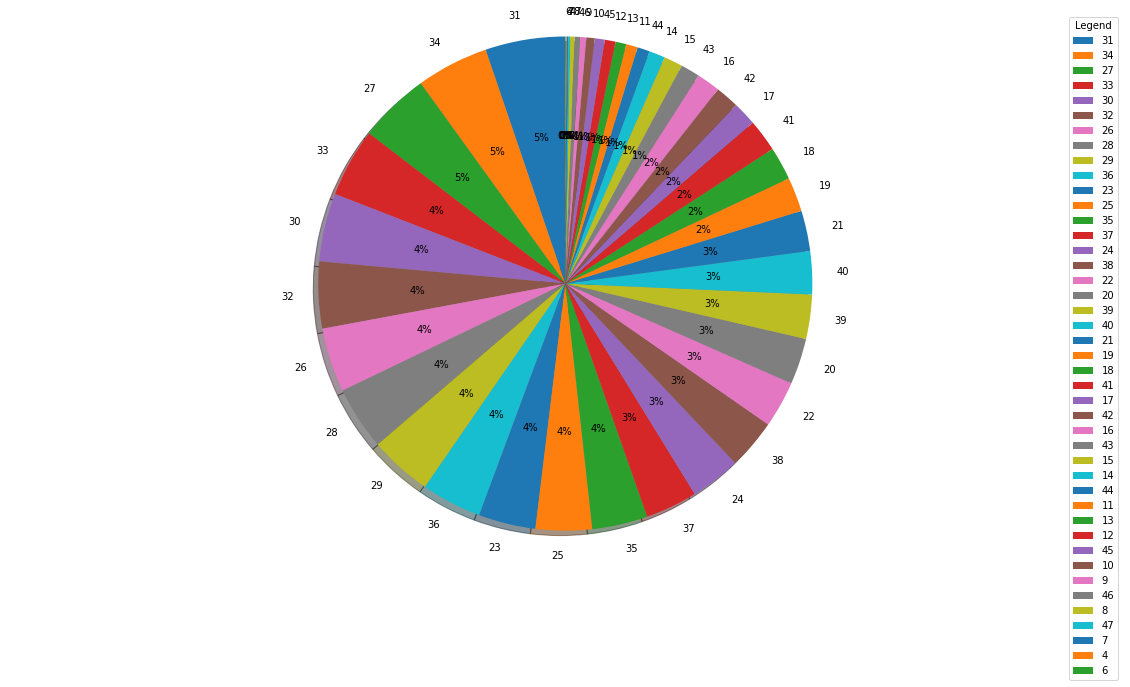

In [32]:
fig1, ax1 = plt.subplots()

explode = (0.05, 0)

ax1.pie(b4vc, autopct='%1.0f%%', labels=b4vc_vals, shadow=True, startangle=90)
ax1.axis('equal')
plt.legend(title="Legend")
plt.show()

### Ball #5

In [33]:
# set
b5 = draws["NUMBER DRAWN 5"]

# describe
b5.describe()

count    3828.000000
mean       36.143939
std         7.249910
min        11.000000
25%        31.000000
50%        37.000000
75%        42.000000
max        48.000000
Name: NUMBER DRAWN 5, dtype: float64

In [34]:
# unique
b5vc = b5.value_counts()
b5vc.columns = ["value"]
b5vc

38    224
41    215
40    211
37    198
43    197
39    191
34    191
42    186
36    172
35    172
45    170
44    168
33    147
46    147
31    144
32    133
30    119
27     97
29     96
47     87
28     86
26     68
24     66
25     59
48     54
22     43
23     40
21     37
20     29
19     24
17     14
18     12
14     11
13      6
16      6
15      3
12      3
11      2
Name: NUMBER DRAWN 5, dtype: int64

<AxesSubplot:>

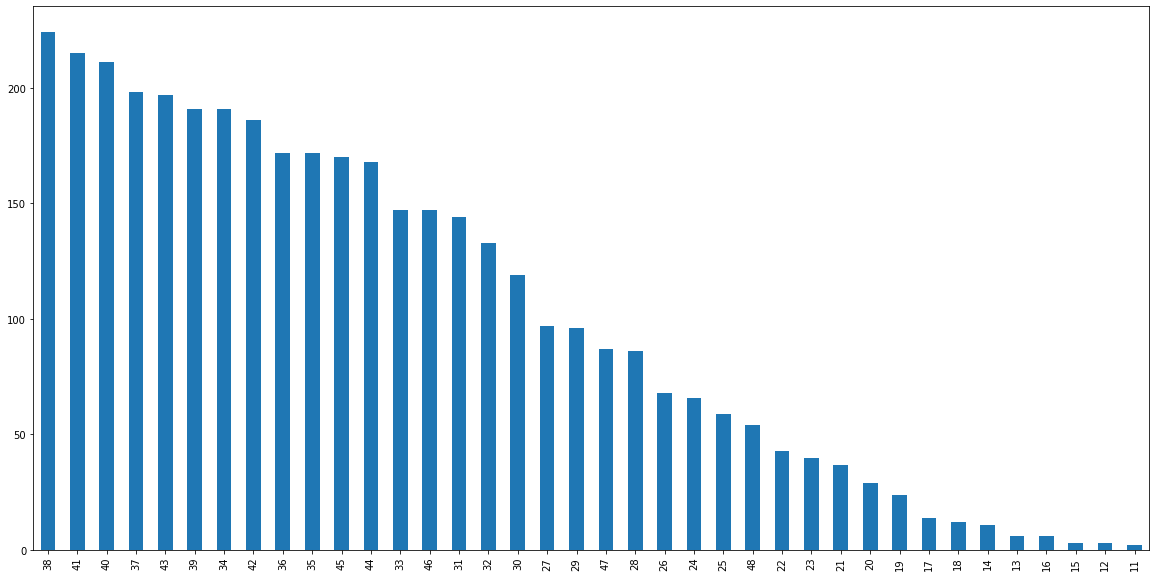

In [35]:
b5vc.plot(kind='bar')

In [36]:
b5vc_vals = b5vc.index
b5vc_vals

Int64Index([38, 41, 40, 37, 43, 39, 34, 42, 36, 35, 45, 44, 33, 46, 31, 32, 30,
            27, 29, 47, 28, 26, 24, 25, 48, 22, 23, 21, 20, 19, 17, 18, 14, 13,
            16, 15, 12, 11],
           dtype='int64')

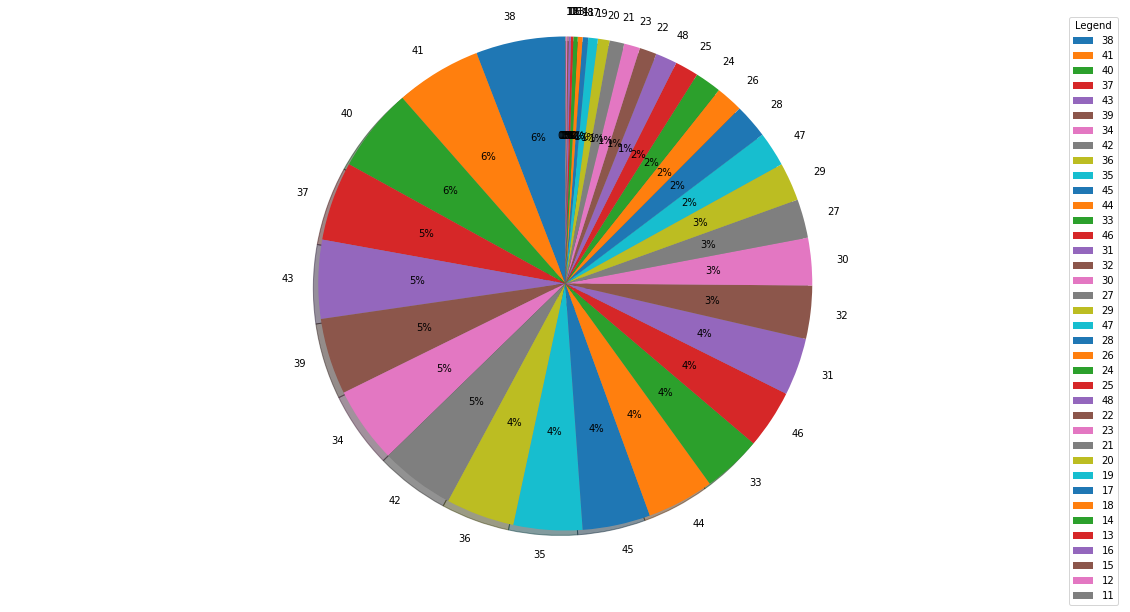

In [37]:
fig1, ax1 = plt.subplots()

explode = (0.05, 0)

ax1.pie(b5vc, autopct='%1.0f%%', labels=b5vc_vals, shadow=True, startangle=90)
ax1.axis('equal')
plt.legend(title="Legend")
plt.show()


### Ball #6


In [38]:
# set
b6 = draws["NUMBER DRAWN 6"]

# describe
b6.describe()

count    3828.000000
mean       43.084378
std         5.551049
min        13.000000
25%        40.000000
50%        45.000000
75%        47.000000
max        49.000000
Name: NUMBER DRAWN 6, dtype: float64

In [39]:
# unique
b6vc = b6.value_counts()
b6vc.columns = ["value"]
b6vc

49    475
48    412
47    404
46    333
45    327
44    274
43    250
42    207
41    162
40    159
39    131
38    108
37     90
36     87
35     78
33     54
34     50
32     41
31     41
29     28
30     26
28     22
27     20
26     13
23      8
25      7
24      6
20      5
21      4
19      3
13      1
22      1
18      1
Name: NUMBER DRAWN 6, dtype: int64

<AxesSubplot:>

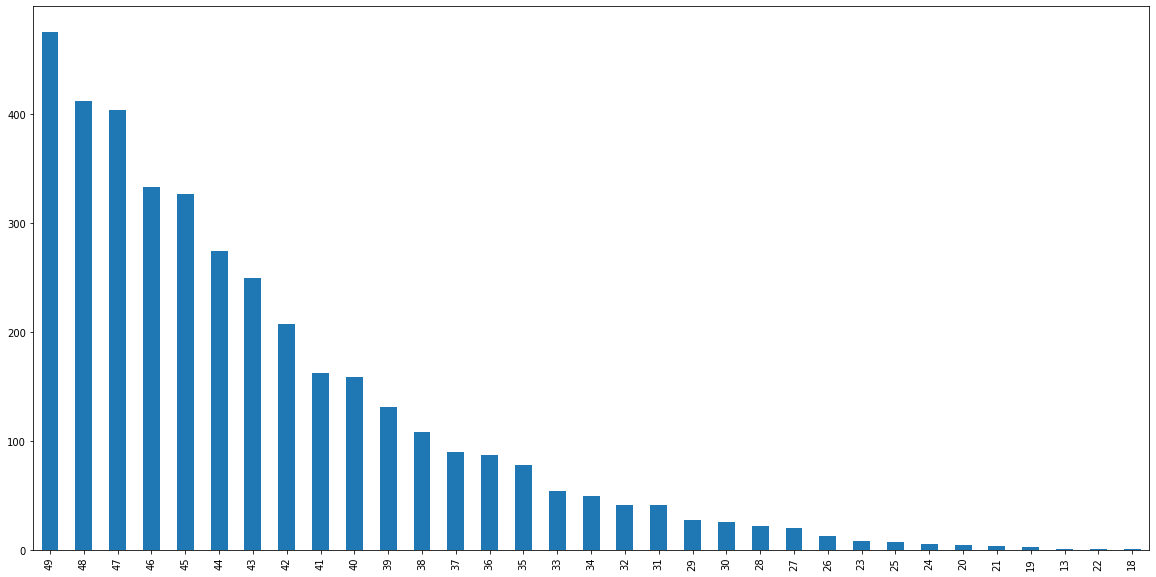

In [40]:
b6vc.plot(kind='bar')

In [41]:
b6vc_vals = b6vc.index
b6vc_vals

Int64Index([49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 33, 34,
            32, 31, 29, 30, 28, 27, 26, 23, 25, 24, 20, 21, 19, 13, 22, 18],
           dtype='int64')

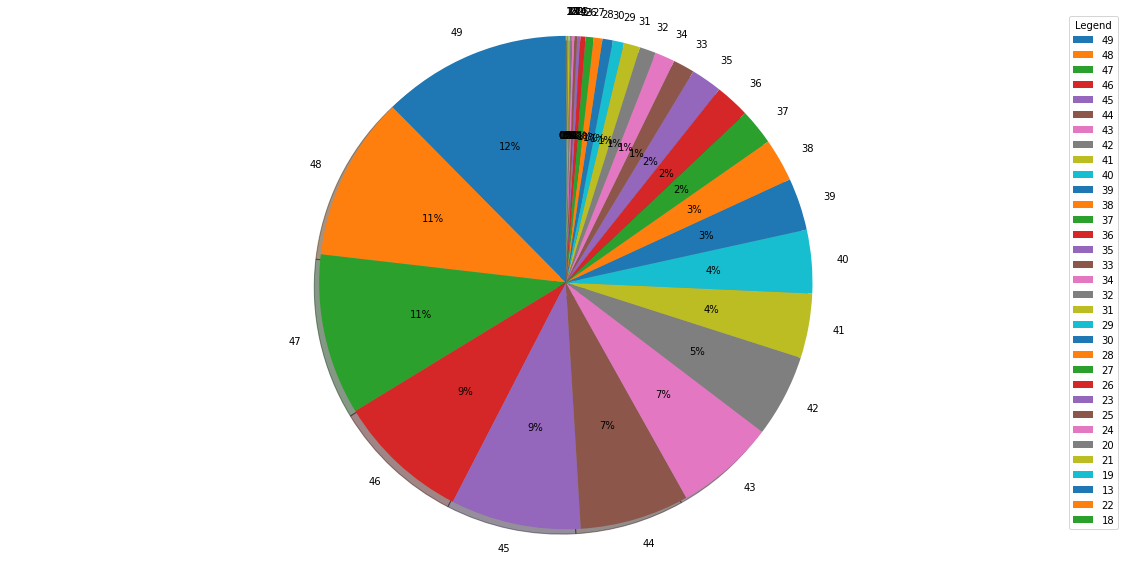

In [42]:
fig1, ax1 = plt.subplots()

explode = (0.05, 0)

ax1.pie(b6vc, autopct='%1.0f%%', labels=b6vc_vals, shadow=True, startangle=90)
ax1.axis('equal')
plt.legend(title="Legend")
plt.show()

## Max Numbers

In [43]:
total_counts = []
total_values = []
for index, column in enumerate(draws.columns):
    df = draws[column].value_counts().to_frame()
    df.columns = ["value"]
    val = df.iloc[0]
    total_counts.append(val.name)
    total_values.append(val.value)
    print("Most drawn number for %s is the number %s at %s times" % (draws.columns[index], str(val.name), str(val.item())) )

Most drawn number for NUMBER DRAWN 1 is the number 1 at 445 times
Most drawn number for NUMBER DRAWN 2 is the number 10 at 201 times
Most drawn number for NUMBER DRAWN 3 is the number 22 at 185 times
Most drawn number for NUMBER DRAWN 4 is the number 31 at 200 times
Most drawn number for NUMBER DRAWN 5 is the number 38 at 224 times
Most drawn number for NUMBER DRAWN 6 is the number 49 at 475 times


In [44]:
total_counts

[1, 10, 22, 31, 38, 49]

In [45]:
total_values

[445, 201, 185, 200, 224, 475]

In [46]:
index = ['Ball 1','Ball 2','Ball 3','Ball 4','Ball 5','Ball 6']
count = 'number chosen'
value = 'times chosen'
columns = [count,value]
df = pd.DataFrame(index=index, columns=columns)
df[count] = total_counts
df[value] = total_values


In [47]:
df

,number chosen,times chosen
Ball 1,1,445
Ball 2,10,201
Ball 3,22,185
Ball 4,31,200
Ball 5,38,224
Ball 6,49,475
